# US9 - Statistical Analysis Report of Water Consumption of Specific Green Space

## 1 - Introduction

This report presents a statistical analysis of equipment usage in a park, aiming to understand user preferences. The data were collected from an electronic device located at the park exit, where users indicated the equipment they used on a given day.

### Data

The data were collected in a CSV file named `EquipmentUsed.csv`. This file contains the choices of 1000 users regarding the equipment used in the park on a given day.

### Statistical Analysis

To perform the statistical analysis of the data, we used the following formulas:

### Mean

The mean ($\bar{x}$), or average, of the water consumption dataset provides a measure of the central tendency. It is calculated by summing all individual water consumption values ($x_i$) and dividing the sum by the total number of observations ($n$).

$ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $

### Median

The median represents the middle value in the dataset when arranged in ascending order. It is a robust measure of central tendency, less affected by outliers compared to the mean. To compute the median, we arrange the water consumption values in ascending order and select the middle value.

### Standard Deviation

The standard deviation ($\sigma$) measures the dispersion or spread of the data around the mean. It indicates the average deviation of each data point from the mean. A higher standard deviation suggests greater variability in the dataset. It is calculated by taking the square root of the variance ($\sigma^2$), which is the average of the squared differences from the mean.

$ \sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}} $

### Skewness Coefficient

Skewness ($\gamma_1$) quantifies the asymmetry of the distribution of water consumption values. A positive skewness coefficient indicates that the distribution is skewed to the right, with a tail extending towards higher values. Conversely, a negative skewness coefficient signifies a left-skewed distribution, with a tail extending towards lower values. Skewness coefficient close to zero suggests symmetry in the distribution.

$ \gamma_1 = \frac{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{n}}{\left(\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}\right)^{3/2}} $

## Absolute and Relative Frequency

This section focuses on elucidating the frequency distribution of water consumption within the park dataset.

### Absolute Frequency

Absolute frequency refers to the count of occurrences of each water consumption value within the dataset. It provides insights into the frequency of specific consumption levels, aiding in understanding the distribution pattern.

### Relative Frequency

Relative frequency, on the other hand, represents the proportion of each water consumption value relative to the total number of observations. It is calculated by dividing the absolute frequency of each value by the total number of observations. This metric facilitates a comparative analysis, highlighting the distribution pattern relative to the entire dataset.




## 2 - Code And Results

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from scipy import stats

#LOAD FILES

water_data = pd.read_csv('water_consumption.csv', delimiter=';')
# Convert 'Consumption' column from object to float
water_data['Consumption'] = water_data['Consumption'].str.replace(',', '.').astype(float)

equipment_data = pd.read_csv('EquipmentUsed.csv', delimiter=';')
inquiry_data = pd.read_csv('Inquiry.csv', delimiter=';')

#### ---------------- DEFINES FUNCTION ---------------- #### 

# Function to filter data based on time period and park identification
def filter_water_data(year, start, end, park):
    data = water_data[(water_data['Year'] == year) & (water_data['Month'] >= start) & (water_data['Month'] <= end) & (water_data['Park'].str.upper() == park)]
    return data

# Function to calculate the water cost given the consumption
def calculate_water_cost(consumption):
    if consumption <= 1000:
        return consumption * 0.7
    else:
        return 1000 * 0.7 + (consumption - 1000) * 0.7 * 1.15
    
# Function to calculate the mean, median, standard deviation, and the coefficient of skewness
def park_statistics(data):
    mean = data['Consumption'].mean()
    median = data['Consumption'].median()
    std_dev = st.stdev(data['Consumption'], xbar=mean)
    skewness = stats.skew(data['Consumption'], bias=False)
        
    return {'mean': mean, 'median': median, 'std_dev': std_dev, 'skewness': skewness}

# Print the statistics
def print_park_statistics(data):
    print('Mean:', data['mean'])
    print('Median:', data['median'])
    print('Standard Deviation:', data['std_dev'])
    print('Coefficient of Skewness:', data['skewness'], '\n')

# Create absolute and relative frequency tables
def create_frequency_tables(data, n_bins):
    min_consumption = data['Consumption'].min()
    max_consumption = data['Consumption'].max()

    edges = np.linspace(min_consumption, max_consumption, n_bins+1)
    lbs = [f'({edges[i]}, {edges[i+1]}]' for i in range(n_bins)]

    absolute_frequency_table = pd.cut(data['Consumption'], bins=edges, labels=lbs, include_lowest=True).value_counts().sort_index()

    total_data_points = absolute_frequency_table.sum()
    relative_frequency_table = (absolute_frequency_table / total_data_points) * 100
    
    print('Absolute frequency table:')
    print(absolute_frequency_table, '\n')
    
    print('Relative frequency table:')
    print(relative_frequency_table, '\n')

# Find if the data has outliers
def find_data_outliers(data):
    q1 = data['Consumption'].quantile(0.25)
    q3 = data['Consumption'].quantile(0.75)
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    outliers = data[(data['Consumption'] < lower_limit) | (data['Consumption'] > upper_limit)]
    
    if outliers.empty:
        print(f'No outliers found for {data["Park"].iloc[0]}\n')
    else:
        print(f'Outliers found for {data["Park"].iloc[0]}:')
        print(outliers, '\n')

# Create the histograms with the given bins
def create_histogram(data, park_name, n_bin):
    plt.figure(figsize=(8, 4))
    plt.hist(data['Consumption'], bins=n_bin)
    plt.title(f'Histogram with {n_bin} Classes of the park {park_name}')
    plt.xlabel('Consumption')
    plt.ylabel('Frequency')
    plt.show()

#### ---------------- DEFINES FUNCTION ---------------- #### 

#### INPUTS

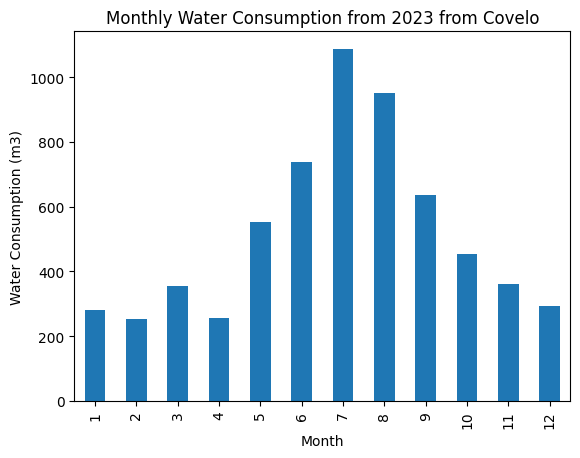

In [5]:
# Asks for user input of time period (Year, Start-Month, End-Month) and park identification.
year = int(input('Enter the year: '))
start_month = int(input('Enter the start month: '))
end_month = int(input('Enter the end month: '))
park_id = input('Enter the park identification: ').upper()

# Filters the water data given the user input
filtered_data = filter_water_data(year, start_month, end_month, park_id)
# Creates the needed data grouping by month and the sum of the consumption
monthly_water_consumption = filtered_data.groupby('Month')['Consumption'].sum()

# Creates a bar plot with the given x and y labels and title
monthly_water_consumption.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Water Consumption (m3)')
plt.title(f'Monthly Water Consumption from {year} from {park_id.title()}')
plt.show()

In [6]:
# Asks for user input of the number of parks
num_parks = int(input('Enter the number of parks to be analyzed: '))

for i in range(num_parks):
    park_id = input('Enter the park identification: ').upper()
    park_data = water_data[water_data['Park'].str.upper() == park_id]
    monthly_data = park_data.groupby(['Year', 'Month'])['Consumption'].sum().reset_index()
    monthly_data['Cost'] = monthly_data['Consumption'].apply(calculate_water_cost)
    print(f'Monthly Data from {park_id.title()}:\n')
    print(monthly_data, '\n')

Monthly Data from Covelo:

    Year  Month  Consumption        Cost
0   2023      1   280.260000  196.182000
1   2023      2   254.110500  177.877350
2   2023      3   353.694600  247.586220
3   2023      4   255.575250  178.902675
4   2023      5   552.293437  386.605406
5   2023      6   737.737875  516.416512
6   2023      7  1087.084294  770.102857
7   2023      8   951.545424  666.081797
8   2023      9   636.916593  445.841615
9   2023     10   454.548286  318.183800
10  2023     11   359.795684  251.856979
11  2023     12   294.753848  206.327693
12  2024      1   280.260000  196.182000
13  2024      2   276.979500  193.885650
14  2024      3   350.292600  245.204820 

Monthly Data from Ocidental:

Empty DataFrame
Columns: [Year, Month, Consumption, Cost]
Index: [] 



In [8]:
min_consumption = water_data['Consumption'].min()
max_consumption = water_data['Consumption'].max()

parks_with_min_consumption = water_data[water_data['Consumption'] == min_consumption]['Park']
parks_with_max_consumption = water_data[water_data['Consumption'] == max_consumption]['Park']

parks_with_min_consumption = set(parks_with_min_consumption)
parks_with_max_consumption = set(parks_with_max_consumption)

parks_with_min_max_consumption = parks_with_min_consumption.intersection(parks_with_max_consumption)

parks_with_max_consumption = [park for park in parks_with_max_consumption if park not in parks_with_min_max_consumption]
parks_with_min_consumption = [park for park in parks_with_min_consumption if park not in parks_with_min_max_consumption]

park_lowest_consumption_data = water_data[water_data['Park'].isin(parks_with_min_consumption)]
park_highest_consumption_data = water_data[water_data['Park'].isin(parks_with_max_consumption)]
park_lowest_highest_consumption_data = water_data[water_data['Park'].isin(parks_with_min_max_consumption)]

for park in parks_with_min_consumption:
    park_data = park_lowest_consumption_data[park_lowest_consumption_data['Park'] == park]
    lowest_consumption_park_stats = park_statistics(park_data)
    print(f'The Statistics for {park} with the minimum consumption are:')
    print_park_statistics(lowest_consumption_park_stats)

for park in parks_with_max_consumption:
    park_data = park_highest_consumption_data[park_highest_consumption_data['Park'] == park]
    highest_consumption_park_stats = park_statistics(park_data)
    print(f'The Statistics for {park} with the maximum consumption are:')
    print_park_statistics(highest_consumption_park_stats)

for park in parks_with_min_max_consumption:
    park_data = park_lowest_highest_consumption_data[park_lowest_highest_consumption_data['Park'] == park]
    lowest_highest_consumption_park_stats = park_statistics(park_data)
    print(f'The Statistics for {park} with the minimum and maximum consumption are:')
    print_park_statistics(lowest_highest_consumption_park_stats)

The Statistics for SaoRoque with the minimum consumption are:
Mean: 15.767447117284595
Median: 13.94495866
Standard Deviation: 10.096174095541373
Coefficient of Skewness: 5.385793517474594 

The Statistics for Covelo with the minimum consumption are:
Mean: 16.04920696392342
Median: 11.898054864999999
Standard Deviation: 10.162274891044522
Coefficient of Skewness: 5.9577233468800515 

The Statistics for Oriental with the minimum consumption are:
Mean: 34.57180279986842
Median: 27.56784845
Standard Deviation: 19.0166663040519
Coefficient of Skewness: 4.065070930500088 

The Statistics for ArcaAgua with the minimum consumption are:
Mean: 8.99599282623465
Median: 6.7718554315
Standard Deviation: 4.852369347899774
Coefficient of Skewness: 2.165560622846681 

The Statistics for Cidade with the minimum and maximum consumption are:
Mean: 116.24058906230263
Median: 85.995
Standard Deviation: 71.72487101415588
Coefficient of Skewness: 3.9991704418176997 



In [9]:
for park in parks_with_min_consumption:
    park_data = park_lowest_consumption_data[park_lowest_consumption_data['Park'] == park]
    print(f'Frequency tables from {park}:\n')
    create_frequency_tables(park_data, 5)

for park in parks_with_max_consumption:
    park_data = park_highest_consumption_data[park_highest_consumption_data['Park'] == park]
    print(f'Frequency tables from {park}:\n')
    create_frequency_tables(park_data, 5)

for park in parks_with_min_max_consumption:
    park_data = park_lowest_highest_consumption_data[park_lowest_highest_consumption_data['Park'] == park]
    print(f'Frequency tables from {park}:\n')
    create_frequency_tables(park_data, 5)

Frequency tables from SaoRoque:

Absolute frequency table:
Consumption
(0.0, 27.020703939999997]                   330
(27.020703939999997, 54.041407879999994]     51
(54.041407879999994, 81.06211181999998]       0
(81.06211181999998, 108.08281575999999]       1
(108.08281575999999, 135.1035197]             1
Name: count, dtype: int64 

Relative frequency table:
Consumption
(0.0, 27.020703939999997]                   86.161880
(27.020703939999997, 54.041407879999994]    13.315927
(54.041407879999994, 81.06211181999998]      0.000000
(81.06211181999998, 108.08281575999999]      0.261097
(108.08281575999999, 135.1035197]            0.261097
Name: count, dtype: float64 

Frequency tables from Covelo:

Absolute frequency table:
Consumption
(0.0, 30.635718759999996]                  402
(30.635718759999996, 61.27143751999999]     41
(61.27143751999999, 91.90715627999998]       0
(91.90715627999998, 122.54287503999998]      0
(122.54287503999998, 153.1785938]            1
Name: count, dtype:

In [10]:
for park in parks_with_min_consumption:
    park_data = park_lowest_consumption_data[park_lowest_consumption_data['Park'] == park]
    find_data_outliers(park_data)

for park in parks_with_max_consumption:
    park_data = park_highest_consumption_data[park_highest_consumption_data['Park'] == park]
    find_data_outliers(park_data)

for park in parks_with_min_max_consumption:
    park_data = park_lowest_highest_consumption_data[park_lowest_highest_consumption_data['Park'] == park]
    find_data_outliers(park_data)

Outliers found for SaoRoque:
          Park  Year  Month  Day  Consumption
988   SaoRoque  2023      8    3   135.103520
1358  SaoRoque  2023     10   16    85.463642
2158  SaoRoque  2024      3   24    43.659000 

Outliers found for Covelo:
       Park  Year  Month  Day  Consumption
857  Covelo  2023      7    8   153.178594 

Outliers found for Oriental:
          Park  Year  Month  Day  Consumption
1265  Oriental  2023      9   28   241.315200
1395  Oriental  2023     10   24   175.677466 

Outliers found for ArcaAgua:
          Park  Year  Month  Day  Consumption
261   ArcaAgua  2023      3    7    30.555000
651   ArcaAgua  2023      5   28    49.218750
1686  ArcaAgua  2023     12   21    25.352759
1821  ArcaAgua  2024      1   17    24.500000 

Outliers found for Cidade:
        Park  Year  Month  Day  Consumption
509   Cidade  2023      4   29   491.400000
804   Cidade  2023      6   27   922.654688
2079  Cidade  2024      3    8   413.595000 



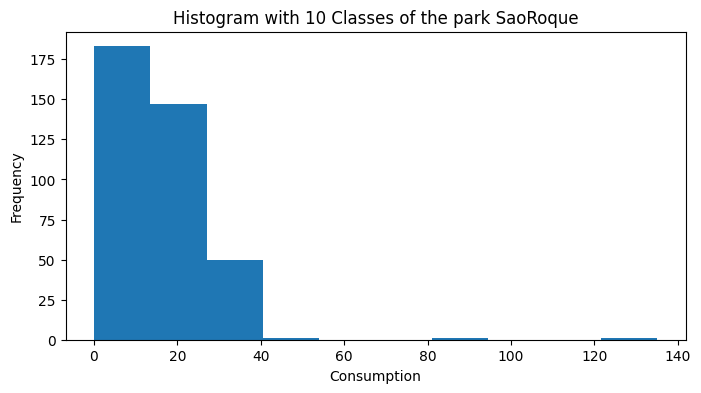

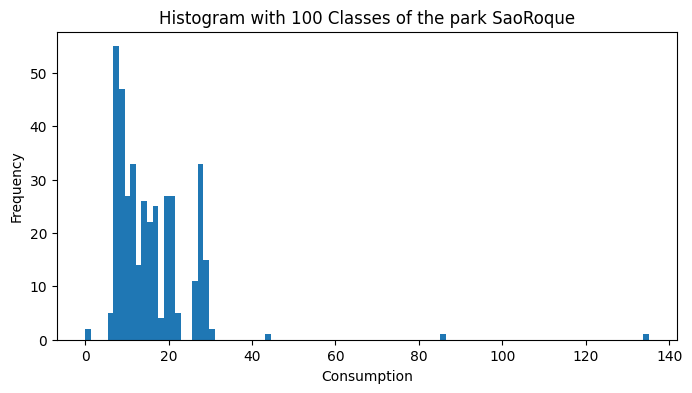

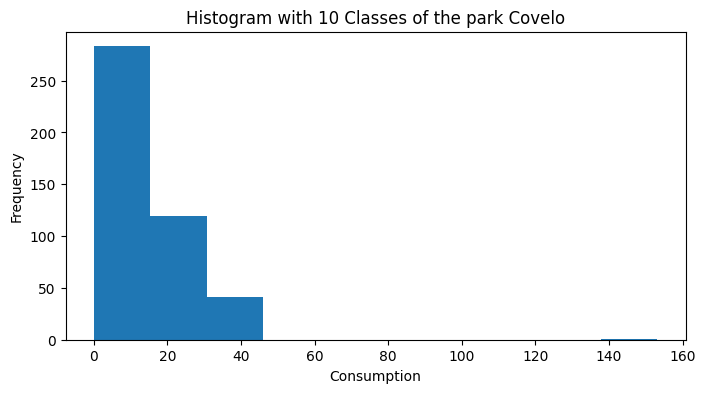

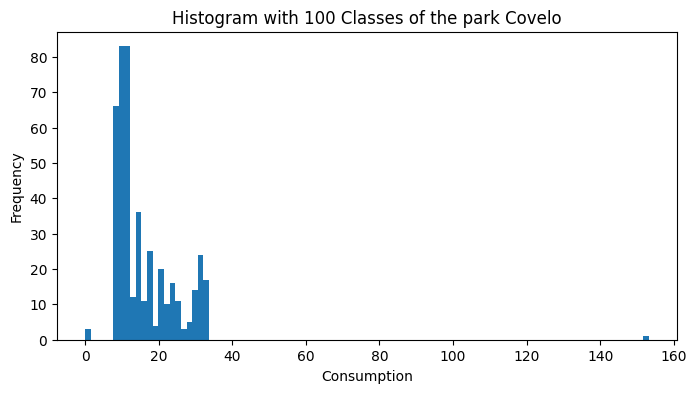

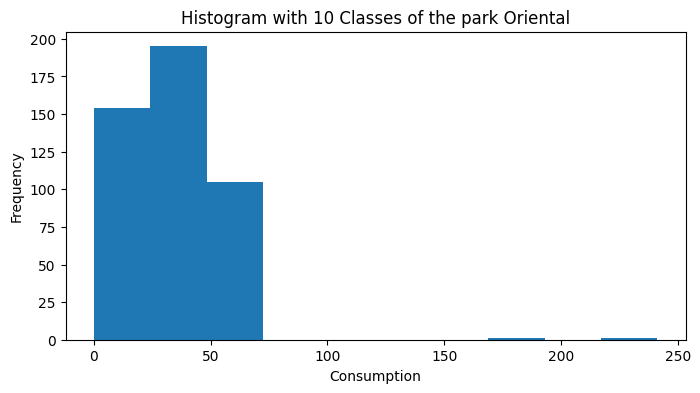

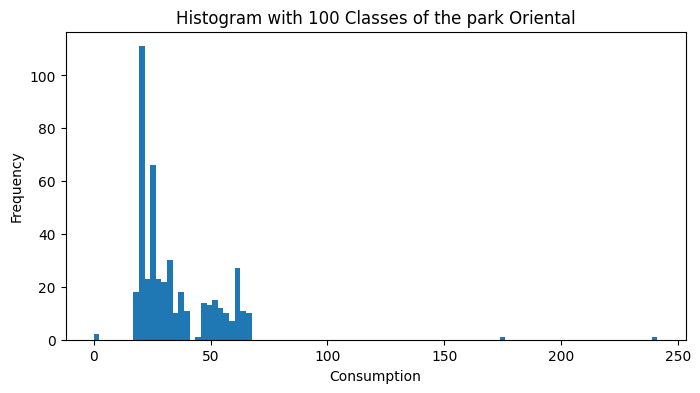

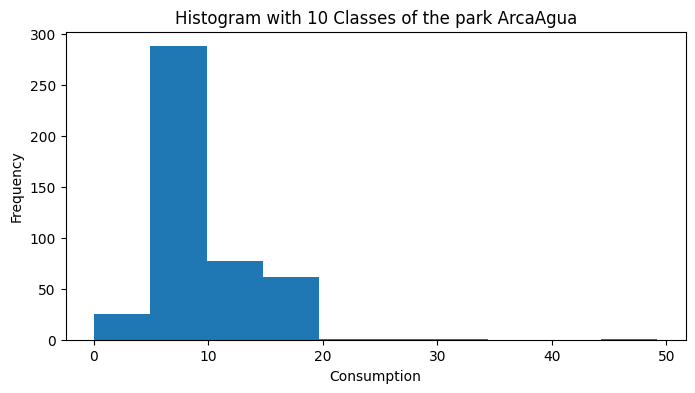

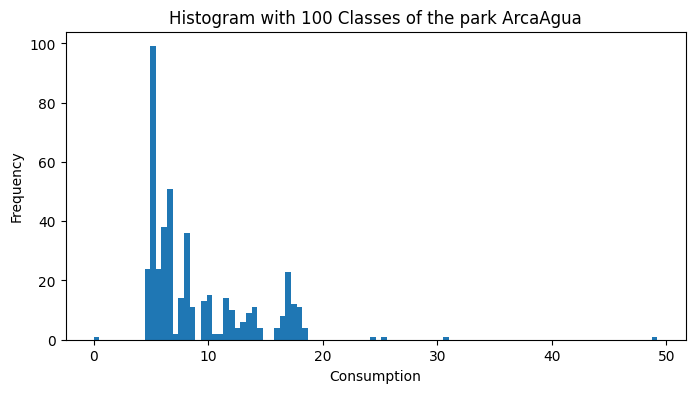

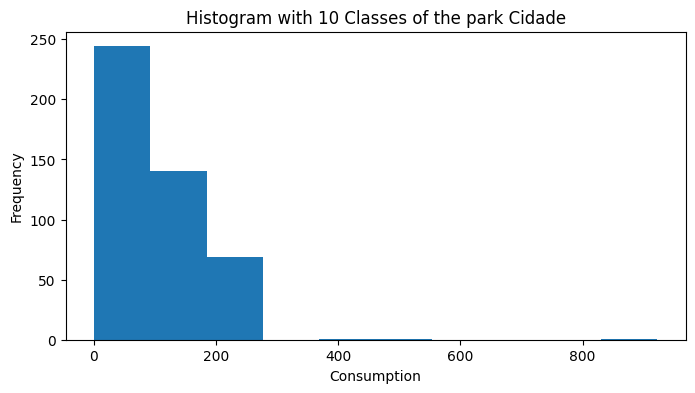

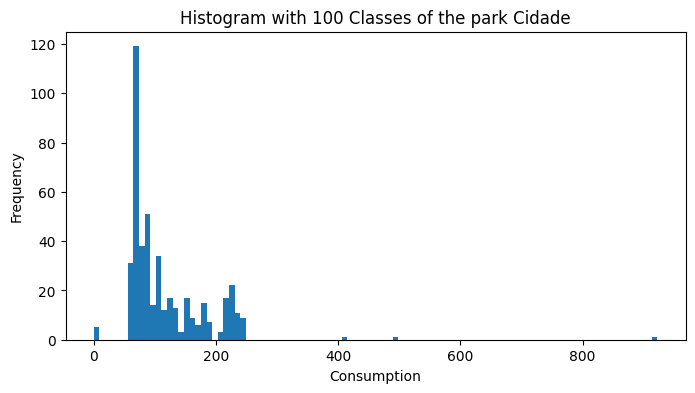

In [11]:
for park in parks_with_min_consumption:
    park_data = park_lowest_consumption_data[park_lowest_consumption_data['Park'] == park]
    create_histogram(park_data, park, 10)
    create_histogram(park_data, park, 100)

for park in parks_with_max_consumption:
    park_data = park_highest_consumption_data[park_highest_consumption_data['Park'] == park]
    create_histogram(park_data, park, 10)
    create_histogram(park_data, park, 100)

for park in parks_with_min_max_consumption:
    park_data = park_lowest_highest_consumption_data[park_lowest_highest_consumption_data['Park'] == park]
    create_histogram(park_data, park, 10)
    create_histogram(park_data, park, 100)

## 3 - Analysis and Interpretation of the Results


ESCREVER

# US10 - Statistical Analysis Report of Equipment Usage in the Park

## 1 - Introduction

This report presents a statistical analysis of equipment usage in a park, aiming to understand user preferences. The data were collected from an electronic device located at the park exit, where users indicated the equipment they used on a given day.

### Data

The data were collected in a CSV file named `EquipmentUsed.csv`. This file contains the choices of 1000 users regarding the equipment used in the park on a given day.

### Statistical Analysis

To perform the statistical analysis of the data, the following steps were followed:

### Characterization and Representation of Data

Regarding the characteristic of the population it represents, this variable is Qualitative, indicating a non-numeric characteristic, regarding the type of values it can take, this variable is classified as Discrete, can take only a finite or countably infinite number of values.

### Qualitative and Discrete Quantitative Data

The absolute frequency of category $i$ ($n_i$) is the number of observations associated with category $i$. 
It is verified that $\sum_{i=1}^{c} n_i = n$, where $n$ is the total number of observations and $c$ is the number of categories.
The relative frequency of category $i$ ($f_i$) is the ratio between the absolute frequency of that category and the total number of observations, 
$f_i = \frac{n_i}{n}$.

### Calculation of Usage Percentage

Based on the occurrence count, we calculated the percentage of usage for each piece of equipment. The usage percentage is calculated by dividing the number of times an equipment was used by the total number of responses and multiplying by 100.


$\text{Usage Percentage} = \frac{\text{Number of Equipment Uses}}{\text{Total Number of Responses}} \times 100$


## 2 - Code and Results

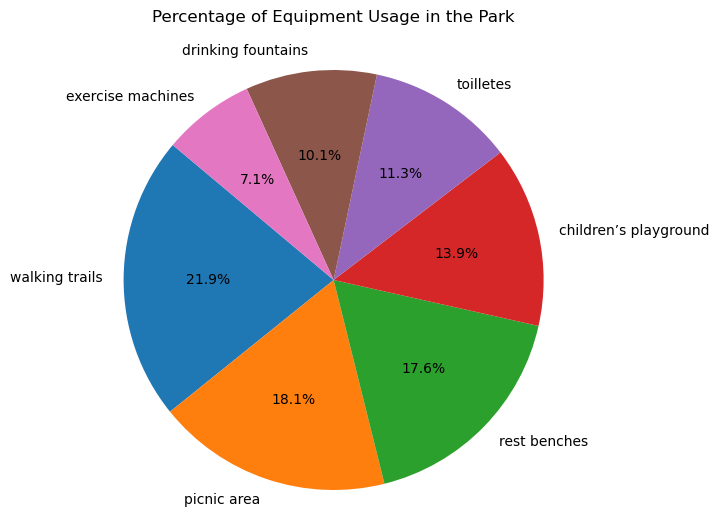

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file, skipping the first row (header)
data = pd.read_csv("EquipmentUsed.csv", header=0)

# Count the occurrences of each piece of equipment
equipment_counts = data['Equipment'].value_counts()

# Calculate the percentage of usage for each piece of equipment
total_usage = equipment_counts.sum()
percentage_usage = (equipment_counts / total_usage) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentage_usage, labels=percentage_usage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Equipment Usage in the Park', pad=20)  # Increase the padding
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Show the plot
plt.show()


## 3 - Analysis and Interpretation of the Results

The percentage of usage for each piece of equipment is as follows:

- Walking Trails: 21.9%
- Picnic Area: 18.1%
- Rest Benches: 17.6%
- Children's Playground: 13.9%
- Toilets: 11.3%
- Drinking Fountains: 10.1%
- Exercise Machines: 7.1%

This analysis reveals that the most used equipment in the park, on that day, is the walking trails, followed by the picnic area. The least used equipment are the exercise machines and the drinking fountains.


# US11 - Statistical Analysis of Park use by different Age Groups

## 1 - Introduction

This report examines how people of different ages use the park. Our main aim is to understand park usage thoroughly.

To achieve this, we've set up a data collection system through a user portal. Within this portal, visitors encounter a concise survey consisting of three questions:

- **Age Range**: Visitors indicate their age group—Child (up to 15 years old), Adult (16 to 65 years old), or Senior (over 65 years old). This categorization helps us grasp park usage trends across different age demographics.
- **Recommendation**: We inquire whether visitors would recommend the park to others. This question captures overall satisfaction levels and highlights areas for potential improvement.
- **Frequency of Visits**: Visitors are asked to specify how often they visit the park each month. This information provides valuable insights into usage patterns and engagement levels.

### Data

The data were collected in a CSV file named `Inquiry.csv`. This file contains the survey answeres of 500 users regarding the age range and number of visits by month.

### Proportion

Proportions are a fundamental concept used to quantify the relationship between favorable outcomes and the total number of cases or observations.
These proportions shed light on the likelihood of recommending the park across different age demographics. Higher proportions indicate a greater likelihood of park recommendation within a specific age group, while lower proportions suggest less inclination towards park recommendation.

$ p = \frac{\text{Number of favorable cases}}{\text{Total number of cases}} $

### Mean

The mean($\bar{x}$) is the average of the number of park visits per month for each age group. For each age group, the total number of park visits is summed($x_i$) and divided by the total number of observations($n$) in that age group.

$ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $

### Median

Represents the middle value of the number of park visits per month for each age group when the data is arranged in ascending order. It's a robust measure of central tendency, less influenced by extreme values compared to the mean. 

## 2 - Code and Results

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
inquiry_data = pd.read_csv('Inquiry.csv', delimiter=';')

print(inquiry_data.dtypes)

Escalao     int64
Y/N        object
Visits      int64
dtype: object


In [3]:
age_recommendation = inquiry_data.groupby(['Escalao', 'Y/N']).size().unstack()
print(age_recommendation)
print() 
recommendation_proportions = age_recommendation['Y'] / age_recommendation.sum(axis=1)
print(recommendation_proportions)

Y/N        N   Y
Escalao         
1         69  62
2         83  99
3        102  85

Escalao
1    0.473282
2    0.543956
3    0.454545
dtype: float64


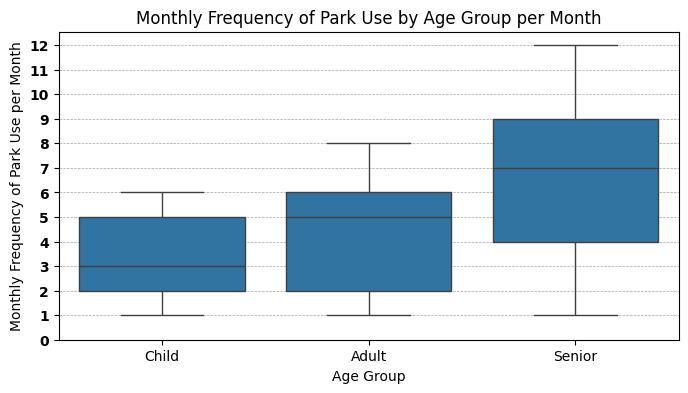

In [4]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=inquiry_data, x='Escalao', y='Visits')
plt.yticks(range(0, inquiry_data['Visits'].max() + 1, 1), fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.title('Monthly Frequency of Park Use by Age Group per Month')
plt.xlabel('Age Group')
plt.ylabel('Monthly Frequency of Park Use per Month')
plt.xticks(ticks=[0, 1, 2], labels=['Child', 'Adult', 'Senior'])
plt.show()

## 3 - Analysis and Interpretation of the Results
### 3.1 - Park Recommendation
We obtain the percentage by age group of those who would recommend the park to others:

- Up to 15 years old - **47.3%**
- Between 16 and 65 years old - **54.4%**
- Over 65 years old - **45.4%**

This analysis reveals that the age group most likely to recommend the park is between 16 and 65 years old, although the other groups also show satisfactory values.
The statistical evidence suggests that approximately half of the park visitors would recommend it to someone else.

### 3.2 - Monthly Frequency of Park Use by Age Group per Month

This analysis provides insights into the monthly park visitation patterns across different age groups. Below are the detailed statistics for each age category.

- **Child (Up to 15 years old)**

    * The range of visits for children varies from 1 to 6, with most children making between 2 and 5 visits per month, as indicated by the quartiles.
    * The median of 3 suggests that half of the children make 3 or fewer visits to the park, while the other half make more than 3 visits.
    * The presence of a minimum value of 1 and the absence of a very high maximum value indicate a relatively consistent distribution of visits, with few outliers.

- **Adult (Between 16 and 65 years old)**
    
    * For adults, the number of visits ranges from 1 to 8, with most making between 2 and 6 visits per month.
    * The median of 5 suggests that half of the adults make 5 or fewer visits to the park, while the other half make more than 5 visits.
    * Similar to children, we observe a relatively consistent distribution, with few outliers.
    
- **Senior (Over 65 years old)**

    * For seniors, the number of visits varies considerably, from 1 to 12, indicating a wide diversity in visitation patterns within this age group.
    * The median of 7 suggests that half of the seniors make 7 or fewer visits to the park, while the other half make more than 7 visits.
    * The presence of a maximum value of 12 indicates that some seniors make a significantly higher number of visits, which may be attributed to different lifestyles and preferences.

These additional insights offer a more detailed understanding of park visitation patterns across different age groups. While children and adults demonstrate relatively consistent visitation behaviors, seniors exhibit a broader range of visitation frequencies. Overall, these findings emphasize the importance of catering to diverse age demographics when designing park amenities and activities.

# Contributions

| Number | Name| % |
|----------|----------|----------|
| 1010488 | Flávio Cruz | 25% |
| 1230840   | Franciso Primaver | 25%|
| 1130277 | Pedro Morgado |25%|
|1210126 | Ricardo Dias |25%|